# GLOFAS historical streamflows: visualization

In this tutorial, we will download and visualise a recent hydrological forecast from GLOFAS, the global flood awareness system that is operated by the European Commission.

## Download data
In order to download GLOFAS data, you will need to have login credentials for the Copernicus Climate Data Store.  
asdf

## Explore and view the data

In [8]:
import os

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
download_file = f'./glofas-june_2012_2022.grib'

In [10]:
glofas_data = xr.open_dataset(download_file)
glofas_data

<xarray.Dataset>
Dimensions:     (time: 330, latitude: 260, longitude: 262)
Coordinates:
  * time        (time) datetime64[ns] 2012-06-01 2012-06-02 ... 2022-06-30
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 3.975 3.925 3.875 ... -8.875 -8.925 -8.975
  * longitude   (longitude) float64 -2.025 -1.975 -1.925 ... 10.93 10.98 11.03
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-01-17T17:08 GRIB to CDM+CF via cfgrib-0.9.1...

### Plotting function

Note: in below function, the extent has the convention [West,East,South,North]. this is different from downloading data from the CDS!

In [31]:
# Create a simple plotting function that we can use throughout this notebook
def plot_map(
    plot_data,
    title='',
    cbar_label='',
    cmap='PuBu',
    extent=[-180, 180, -90, 90], #[x0,x1,y0,y1] = [West,East,South,North]
    **pcolorkwargs
):
    # Populate the title and cbar_label with attributes from the plot_data if they have not been
    #  explicitly specified
    title = title or plot_data.attrs.get('long_name', title)
    cbar_label = cbar_label or plot_data.attrs.get('units', cbar_label)

    # Create a figure with a cartopy projection assigned which allows plotting geospatial data
    fig, ax = plt.subplots(
        1, 1, figsize = (18, 9), subplot_kw={'projection': ccrs.PlateCarree()}
    )

    # Plot the data on our figure
    im = ax.pcolormesh(
        plot_data.longitude, plot_data.latitude, plot_data, cmap=cmap, **pcolorkwargs
    )

    # Add some additional features
    ax.set_title(title, fontsize=16)
    ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
    ax.coastlines(color='black')

    # Add country borders in red
    ax.add_feature(cfeature.BORDERS, edgecolor='black', lw=1.5, ls=":")

    # Set the plot domain/extent
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Add a colour bar
    cbar = plt.colorbar(im,fraction=0.04, pad=0.01)
    cbar.set_label(cbar_label, fontsize=12) 

### Plot mean streamflow

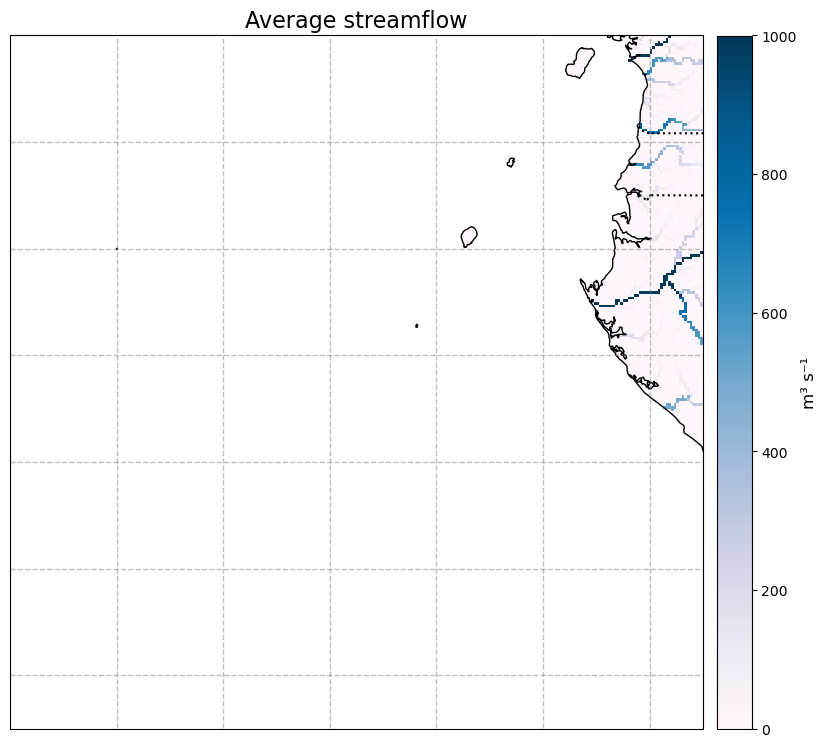

In [37]:
mean_data = glofas_data.dis24.mean(dim='time')
mean_data = mean_data.assign_attrs(**glofas_data.dis24.attrs)
plot_map(
    mean_data,
    vmax=1e3, vmin=0,
    cbar_label = "m³ s⁻¹",
    extent=[-2, 11, -9, 4], #[x0,x1,y0,y1] = [West,East,South,North]
    title = 'Average streamflow'
)

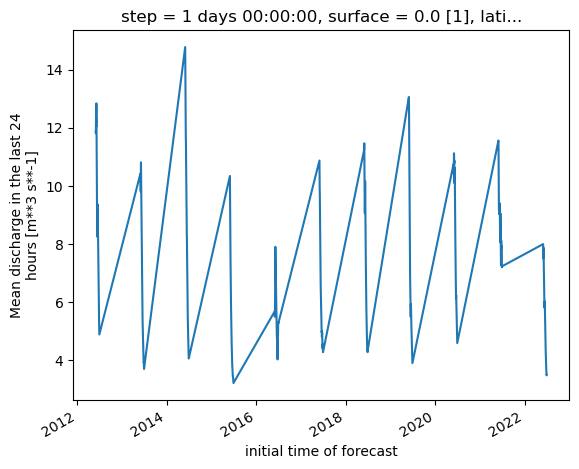

In [40]:
glofas_data.dis24.sel(latitude=0, longitude=10, method='nearest').plot()

Plot an ensemble forecast

In [ ]:
Q = sim_grid.Q.sel(x=5.694536, y=50.815519, method='nearest')
fig, ax = plt.subplots()
for i in range(Q.shape[0]):
  ax.plot(Q['time'].values, Q.values[:,i], color='gray', alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('Streamflow [m3/s]')
ax.set_title('Plume plot')
plt.show()